In [227]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [228]:
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [229]:
df.shape

(1460, 81)

In [230]:
isnull_column = df.isnull().sum().sort_values(ascending=False)
isnull_column

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
MasVnrType        872
                 ... 
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
SalePrice           0
Length: 81, dtype: int64

In [231]:
df = df.drop_duplicates()
df.shape

(1460, 81)

Удаляю столбцы в которых количество пропусков больше половины от кол-ва строк в данных

In [232]:
cols_to_remove = []
for ind in isnull_column.index:
    if isnull_column[ind] > df.shape[0] / 2:
        cols_to_remove.append(ind)

df = df.drop(cols_to_remove, axis=1)
df.shape

(1460, 76)

In [233]:
isnull_column = df.isnull().sum().sort_values(ascending=False)
isnull_column

FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageQual        81
GarageFinish      81
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 76, dtype: int64

In [234]:
numeric_columns = df.loc[:,df.dtypes!=object].columns

df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [235]:
# Для числовых столбцов заполним все пропуски средним значением

for col in numeric_columns:
    df[col] = df[col].fillna(df[col].mean())
    

In [236]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,22.024023,9981.264932,1.382997,1.112799,30.202904,20.645407,180.569112,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,70.049958,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


В нечисловых столцах заполню пропуски - медианным значением

In [237]:
non_numeric_columns = df.loc[:,df.dtypes==object].columns

for col in non_numeric_columns:
    df[col] = df[col].fillna(df[col].median)


In [238]:
isnull_column = df.isnull().sum().sort_values(ascending=False)
isnull_column

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 76, dtype: int64

In [239]:
df[non_numeric_columns].head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,<bound method Series.median of 0 NaN\n1 ...,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


In [240]:
df[non_numeric_columns].describe()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
count,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,...,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460
unique,5,2,4,4,2,5,3,25,9,8,...,4,7,6,7,4,6,6,3,9,6
top,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,TA,Typ,<bound method Series.median of 0 NaN\n1 ...,Attchd,Unf,TA,TA,Y,WD,Normal
freq,1151,1454,925,1311,1459,1052,1382,225,1260,1445,...,735,1360,690,870,605,1311,1326,1340,1267,1198


In [241]:
for col in non_numeric_columns:
    print(df[col].value_counts())

MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64
Street
Pave    1454
Grvl       6
Name: count, dtype: int64
LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: count, dtype: int64
LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: count, dtype: int64
Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64
LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: count, dtype: int64
LandSlope
Gtl    1382
Mod      65
Sev      13
Name: count, dtype: int64
Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: count, dtype:

In [242]:
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()
for col in non_numeric_columns:
    if len(df[col].unique()) == 2:
        df[col] = le.fit_transform(df[col].astype(str))
        

In [243]:
df[non_numeric_columns].head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,1,Reg,Lvl,0,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,<bound method Series.median of 0 NaN\n1 ...,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,1,Reg,Lvl,0,FR2,Gtl,Veenker,Feedr,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,1,IR1,Lvl,0,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,1,IR1,Lvl,0,Corner,Gtl,Crawfor,Norm,Norm,...,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,1,IR1,Lvl,0,FR2,Gtl,NoRidge,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


In [244]:
non_numeric_columns = df.loc[:,df.dtypes==object].columns
non_numeric_columns

Index(['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [245]:
for col in non_numeric_columns:
    if len(df[col].unique()) < 5:
        one_hot = pd.get_dummies(df[col], prefix=col, drop_first=True)
        df = pd.concat((df.drop(col, axis=1), one_hot), axis=1)
    else:
        mean_sales_price = df.groupby(col)['SalePrice'].mean()
        df[col] = df[col].map(mean_sales_price)    


In [246]:
non_numeric_columns = df.loc[:,df.dtypes==object].columns
non_numeric_columns

Index([], dtype='object')

In [247]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

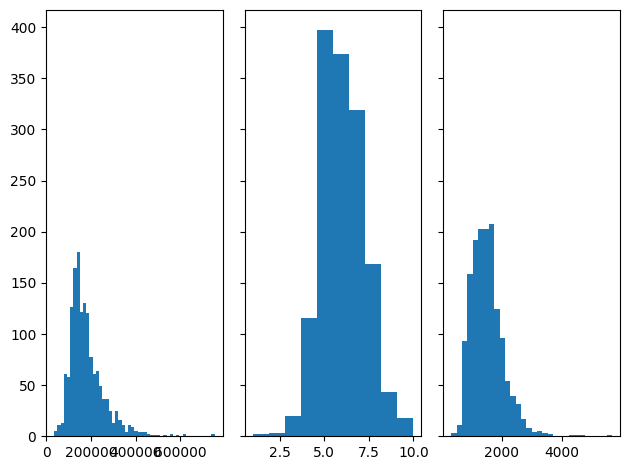

In [248]:
import matplotlib.pyplot as plt
import seaborn as sns


fig, axs = plt.subplots(1, 3, sharey=True, tight_layout=True)

axs[0].hist(df['SalePrice'], bins=50)
axs[1].hist(df['OverallQual'], bins=10)
axs[2].hist(df['GrLivArea'], bins=30)
    
plt.show()

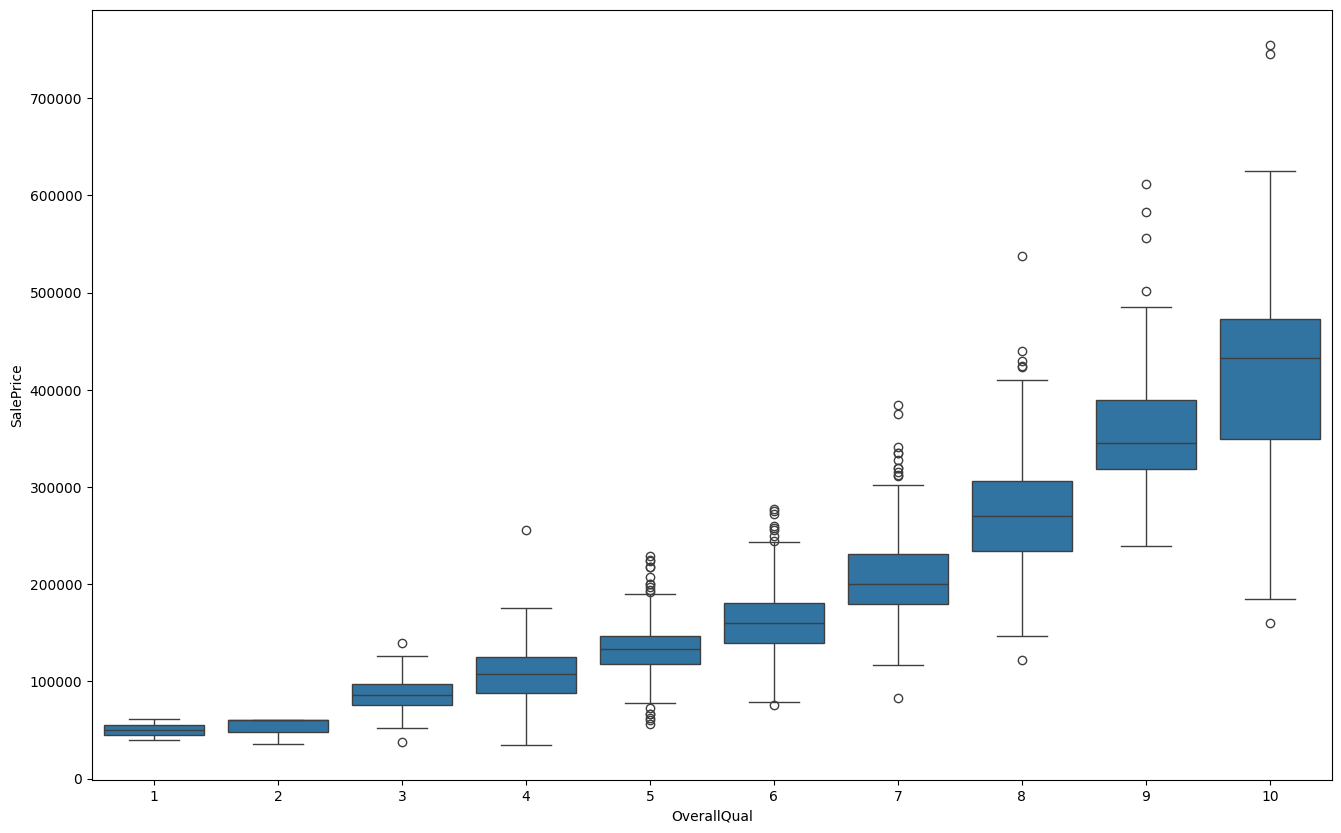

In [249]:
fig_1 = plt.figure()
fig_1.set_size_inches(16, 10)

sns.boxplot(y='SalePrice',  x=df['OverallQual'].astype('category'), data=df)
plt.show()

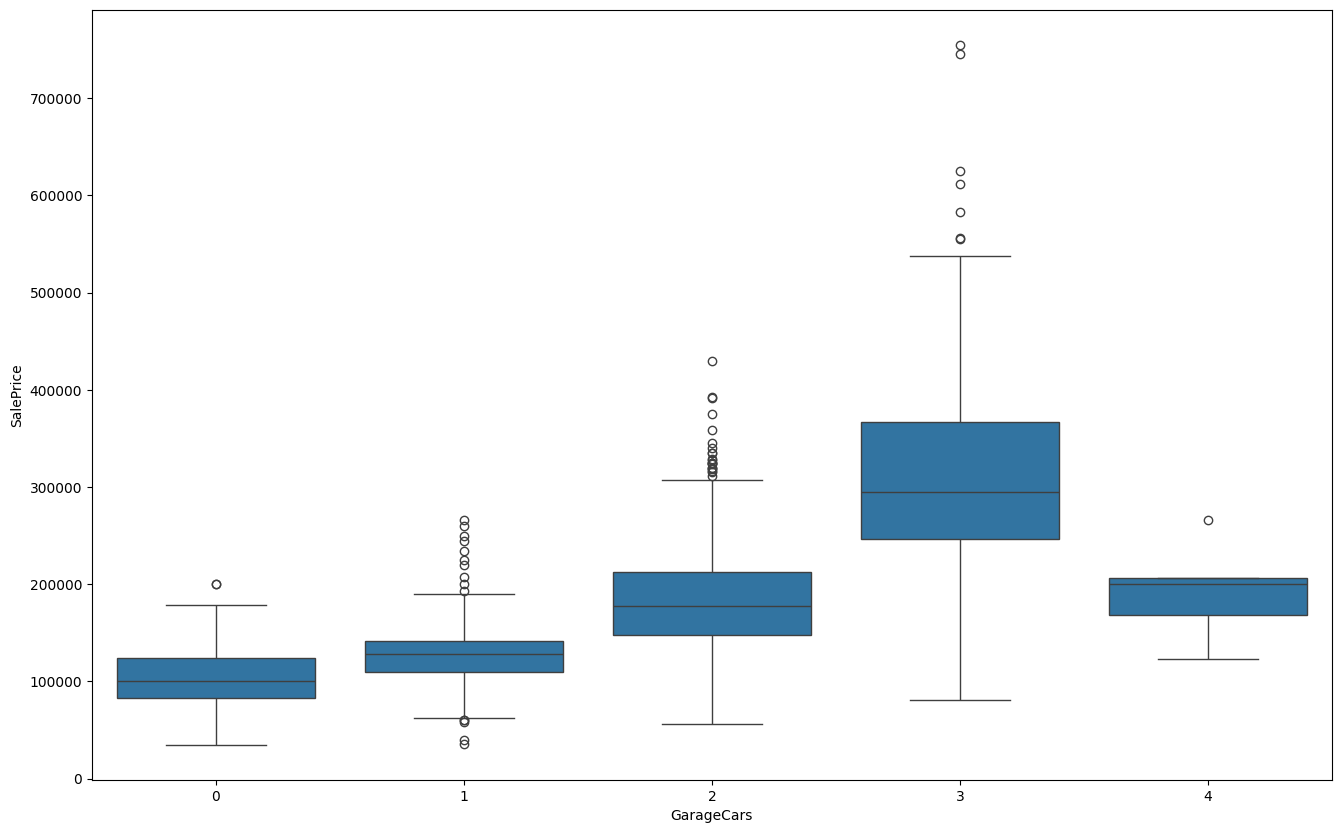

In [250]:
fig_1 = plt.figure()
fig_1.set_size_inches(16, 10)

sns.boxplot(y='SalePrice',  x=df['GarageCars'].astype('category'), data=df)
plt.show()

In [252]:
X = df.drop('SalePrice', axis=1)
Y = df['SalePrice']
X.corr()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Utilities,LotConfig,Neighborhood,Condition1,...,ExterQual_Gd,ExterQual_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_P,PavedDrive_Y
Id,1.000000,0.011156,0.027866,-0.009601,-0.033226,0.008916,1.332409e-02,-0.009770,-0.012464,-0.003537,...,0.018662,-0.011072,-0.010799,0.020933,-0.014973,0.005729,0.009579,-0.007513,0.022269,-0.000355
MSSubClass,0.011156,1.000000,-0.227841,-0.357056,-0.139781,-0.024969,-2.284384e-02,-0.047871,-0.009743,0.003679,...,0.047870,-0.041021,0.016676,0.022411,-0.010836,0.012199,-0.045044,-0.008807,-0.025338,-0.047611
MSZoning,0.027866,-0.227841,1.000000,0.266116,0.149459,0.097480,1.013602e-02,0.099816,0.422658,0.128241,...,0.241872,-0.225020,-0.109298,0.214421,-0.215832,0.147732,0.214097,-0.257437,-0.086847,0.296128
LotFrontage,-0.009601,-0.357056,0.266116,1.000000,0.306795,-0.037323,-5.447825e-18,-0.022581,0.221668,0.004290,...,0.082556,-0.141738,0.000627,0.049090,-0.136764,0.133525,0.127648,-0.188336,-0.012554,0.083739
LotArea,-0.033226,-0.139781,0.149459,0.306795,1.000000,-0.197131,1.012318e-02,0.184746,0.153487,0.014251,...,0.003151,-0.027890,-0.033694,0.004941,-0.031154,0.102667,0.014502,-0.068099,0.012568,0.010431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GarageFinish_Fin,0.005729,0.012199,0.147732,0.133525,0.102667,0.011178,-1.475618e-02,0.059182,0.335775,0.132748,...,0.272727,-0.344612,-0.073515,0.142812,-0.260066,1.000000,-0.359384,-0.474129,-0.059064,0.133691
GarageFinish_RFn,0.009579,-0.045044,0.214097,0.127648,0.014502,-0.006277,4.105961e-02,0.030596,0.250491,0.088234,...,0.275290,-0.242469,-0.096261,0.267006,-0.206837,-0.359384,1.000000,-0.536355,-0.060401,0.157801
GarageFinish_Unf,-0.007513,-0.008807,-0.257437,-0.188336,-0.068099,0.010569,-2.202252e-02,-0.053965,-0.425512,-0.156499,...,-0.413292,0.457215,0.041727,-0.291677,0.365483,-0.474129,-0.536355,1.000000,0.103580,-0.122882
PavedDrive_P,0.022269,-0.025338,-0.086847,-0.012554,0.012568,0.009304,-3.791971e-03,-0.024540,-0.092107,-0.042110,...,-0.092394,0.103312,0.065834,-0.059503,0.056946,-0.059064,-0.060401,0.103580,1.000000,-0.484010


In [253]:
def get_redundant_pairs(df):
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(X, 50))

Top Absolute Correlations
SaleType        SaleCondition     0.924211
Exterior1st     Exterior2nd       0.907822
ExterQual_Gd    ExterQual_TA      0.906121
GarageCars      GarageArea        0.882475
GarageQual      GarageCond        0.849723
GrLivArea       TotRmsAbvGrd      0.825489
KitchenQual_Gd  KitchenQual_TA    0.824457
TotalBsmtSF     1stFlrSF          0.819530
Fireplaces      FireplaceQu       0.794201
YearBuilt       GarageYrBlt       0.780555
2ndFlrSF        GrLivArea         0.687501
Neighborhood    OverallQual       0.685360
YearBuilt       Foundation        0.683944
BedroomAbvGr    TotRmsAbvGrd      0.676620
OverallQual     BsmtQual          0.674002
ExterQual_TA    KitchenQual_TA    0.671600
Foundation      GarageYrBlt       0.656799
BsmtFinSF1      BsmtFullBath      0.649212
OverallQual     ExterQual_TA      0.646247
YearBuilt       BsmtQual          0.645010
Neighborhood    BsmtQual          0.631498
GrLivArea       FullBath          0.630012
ExterQual_Gd    KitchenQual_

Удалим одну из колонок, если между ними корреляция более 80%

In [260]:
df = df.drop(['SaleType', 'Exterior2nd', 'ExterQual_TA', 'GarageArea', 'GarageCond', 'TotRmsAbvGrd', 'KitchenQual_TA', '1stFlrSF'], axis=1)
df.shape

(1460, 80)

In [261]:
df.to_csv('cleaned_house_prices.csv', index=False)